## <center> Importing Libs

In [90]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (13, 8)
plt.rcParams["font.size"] = 14

import seaborn as sns
# Customizing seaborn color palette
sns.light_palette("seagreen", as_cmap=True)
sns.set(style="darkgrid")

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook_connected"

from statsmodels.graphics.tsaplots import plot_pacf

import warnings 
warnings.filterwarnings('ignore')

## <center> Importing Data

In [91]:
data = pd.read_csv('data/AAPL.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-09,146.199997,146.699997,145.520004,146.089996,145.275925,48908700
1,2021-08-10,146.440002,147.710007,145.300003,145.600006,144.788681,69023100
2,2021-08-11,146.050003,146.720001,145.529999,145.860001,145.047211,48493500
3,2021-08-12,146.190002,149.050003,145.839996,148.889999,148.060333,72282600
4,2021-08-13,148.970001,149.440002,148.270004,149.100006,148.269165,59375000


## <center> Data info

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [93]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,156.728849,158.741230,154.936031,156.937064,156.393229,8.833357e+07
std,12.519433,12.581548,12.325041,12.448971,12.402639,2.652324e+07
min,130.070007,132.389999,129.039993,130.059998,129.879593,4.100000e+07
25%,147.024998,148.917499,145.729996,147.100003,146.858505,6.947065e+07
50%,154.985001,156.889999,153.069999,155.099999,154.471657,8.325120e+07
75%,167.607498,169.727493,165.512501,166.727497,166.251965,1.008644e+08
max,182.630005,182.940002,179.119995,182.009995,181.259918,1.954327e+08


## <center> Data Visualization

In [94]:
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA5'] = data['Close'].rolling(window=5).mean()

fig = go.Figure(
    data=[go.Candlestick(
        x=data['Date'],
        open=data['Open'],
        high=data['High'],
        low=data['Low'],
        close=data['Close']
    )]
)

fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_layout(height = 600, width = 1000, title = 'AAPL Stock Price')

fig.add_trace(
    go.Scatter(
        x=data['Date'], 
        y=data['MA5'], 
        opacity=0.7, 
        line=dict(color='blue', width=2), 
        name='MA 5'
    )
)
fig.add_trace(
    go.Scatter(
        x=data['Date'], 
        y=data['MA20'], 
        opacity=0.7, 
        line=dict(color='orange', width=2), 
        name='MA 20'
    )
)



fig.show()

## <center> Correlation check

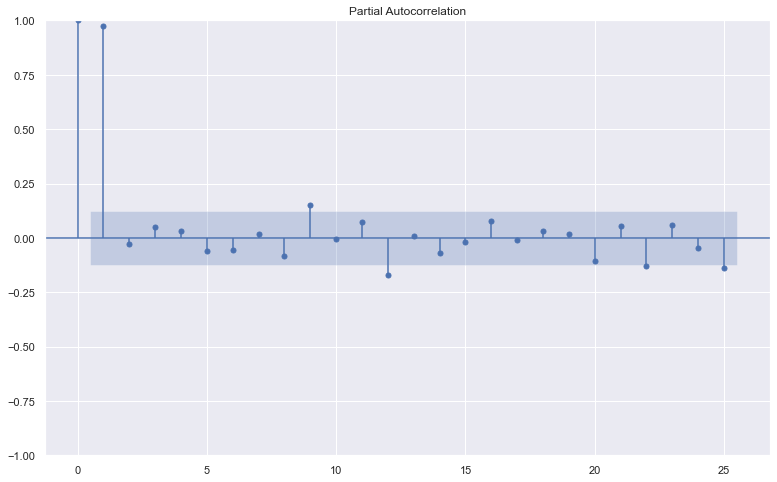

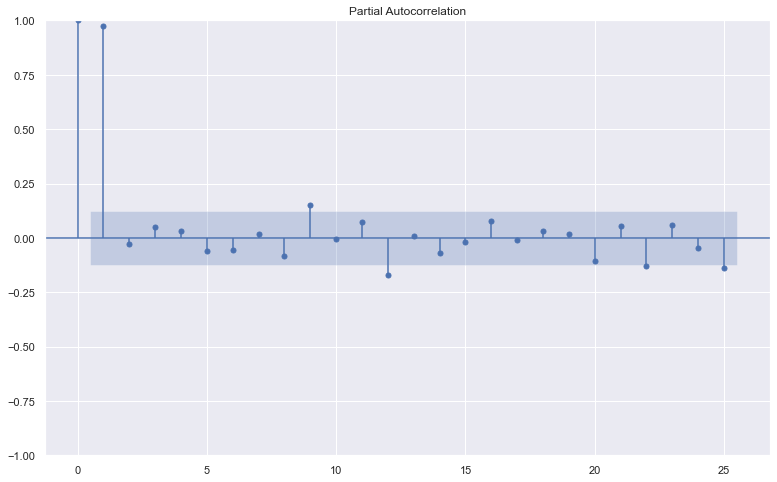

In [95]:
plot_pacf(data['Close'])

## <center> Stationarity test

In [96]:
from pmdarima.arima import ADFTest

adftest = ADFTest()
adftest.should_diff(data['Close'])

(0.623848145987983, True)

## <center> Dividing Into Train / Test

In [97]:
divider = 225

X_train = data['Date'].iloc[:divider]
X_test = data['Date'].iloc[divider:]

y_train = data['Close'].iloc[:divider]
y_test = data['Close'].iloc[divider:]

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (225,)
X_test shape: (27,)
y_train shape: (225,)
y_test shape: (27,)


Text(0.5, 1.0, 'Train/Test data')

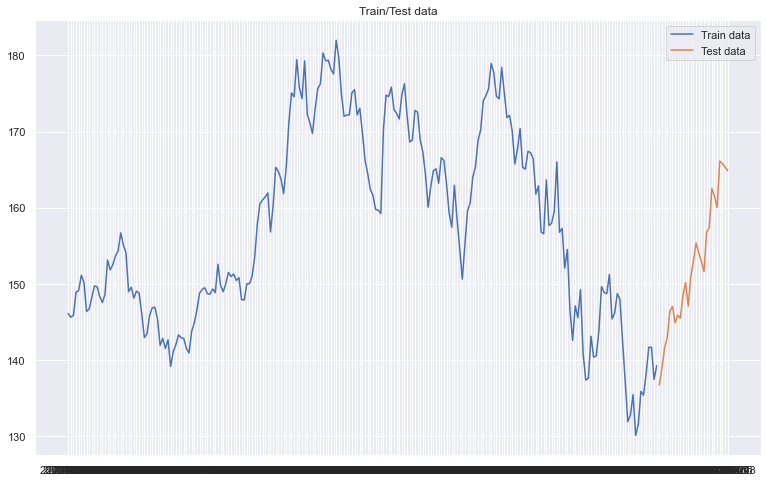

In [98]:
plt.plot(X_train, y_train, label = 'Train data')
plt.plot(X_test, y_test, label = 'Test data')
plt.legend()
plt.title('Train/Test data')

## <center> Setup ARIMA model

In [116]:
from pmdarima.arima import auto_arima

arima_model = auto_arima(
    y_train,
    start_p=1, 
    start_q=1,
    test='adf',
    max_p=5, 
    max_q=5,
    m=1,             
    d=1,          
    seasonal=False, 
    stationary=True,  
    start_P=0, 
    D=None, 
    trace=True,
    error_action='ignore',  
    suppress_warnings=True, 
    stepwise=True
)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1147.596, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1786.782, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1145.811, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1535.154, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2918.686, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1147.625, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1144.373, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1150.564, Time=0.13 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1150.756, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1148.796, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1148.598, Time=0.08 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1150.504, Time=0.08 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 1.041 seconds


In [117]:
prediction = arima_model.predict(n_periods = 27)

Text(0.5, 1.0, 'Train/Test data')

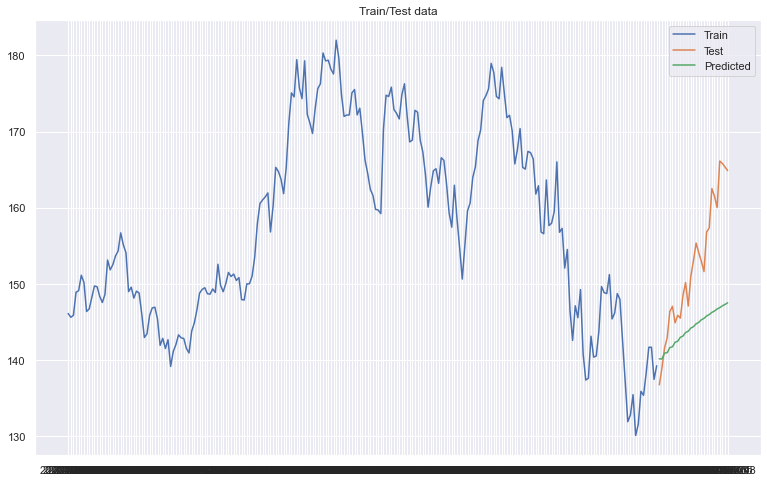

In [118]:
plt.plot(X_train, y_train, label = 'Train')
plt.plot(X_test, y_test, label = 'Test')
plt.plot(X_test, prediction, label = 'Predicted')
plt.legend()
plt.title('Train/Test data')

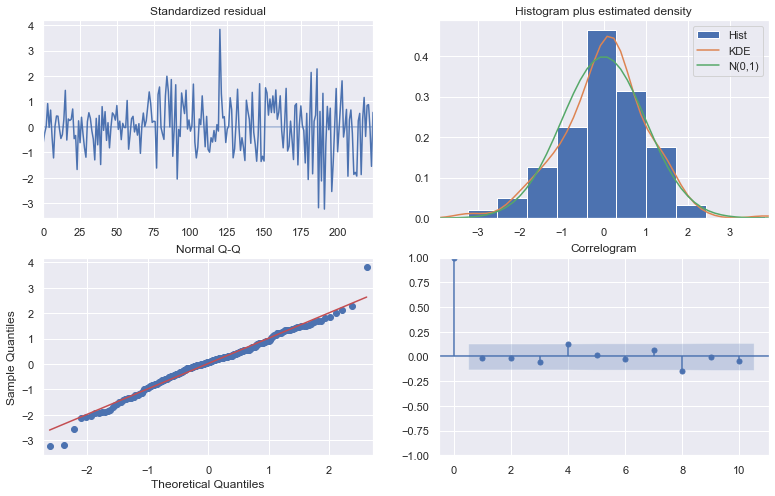

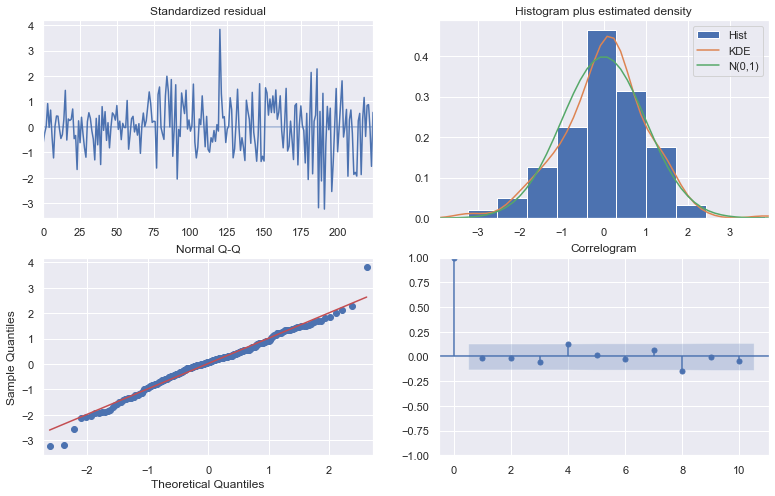

In [112]:
arima_model.plot_diagnostics()